### Reviews data - flipkart boat earphone product

### import necessary library

In [87]:
import pandas as pd
import nltk
import spacy
from nltk import tokenize
from nltk.corpus import stopwords
import string
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import en_core_web_sm

In [92]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


### import dataset

In [85]:
! pip install spacy

In [54]:
review_data = pd.read_csv('Flipkart_Reviews.csv')
review_data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


### Initial analysis

In [55]:
review_data.shape

(9976, 2)

In [56]:
review_data.isna().sum()

review    0
rating    0
dtype: int64

In [57]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


### preprocessing technique on text data

In [58]:
review_data = [review.strip() for review in review_data.review ]

In [59]:
review_data

["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE",
 'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE',
 'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE',
 'I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is p

In [60]:
review_data = [x for x in review_data if x]

In [61]:
review_data[0:10]

["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE",
 'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE',
 'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE',
 'I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is p

In [62]:
review_data_new = ' '.join(review_data)
review_data_new

'It was nice produt. I like it\'s design a lot.  It\'s easy to carry. And.   Looked stylish.READ MORE awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty good 

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenizeing the sentence

In [64]:
sentence = tokenize.sent_tokenize(''.join(review_data_new))

In [65]:
sentence[0:10]

['It was nice produt.',
 "I like it's design a lot.",
 "It's easy to carry.",
 'And.',
 'Looked stylish.READ MORE awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality.',
 'pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output.',
 'Bass and treble are really very clear without equaliser.',
 'With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention.',
 'Really expecting other leading brands to implement this.ConsVery tight in ears.',
 'adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good .']

In [66]:
len(sentence)

5161

In [67]:
sent_df = pd.DataFrame(sentence, columns=['review_sentence'])

In [68]:
sent_df

,review_sentence
0,It was nice produt.
1,I like it's design a lot.
2,It's easy to carry.
3,And.
4,Looked stylish.READ MORE awesome sound....very...
...,...
5156,"Build is ok, little tight on my ear, but I am ..."
5157,(I would need to replace this headphone)2. can...
5158,charging cable is too short (~ 1...READ MORE T...
5159,The sound quality is too awesome and the bass ...


In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
my_stopwords = stopwords.words('english')

In [71]:
sent_df['no_stop_word']= sent_df['review_sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [72]:
sent_df

,review_sentence,no_stop_word
0,It was nice produt.,It nice produt.
1,I like it's design a lot.,I like design lot.
2,It's easy to carry.,It's easy carry.
3,And.,And.
4,Looked stylish.READ MORE awesome sound....very...,Looked stylish.READ MORE awesome sound....very...
...,...,...
5156,"Build is ok, little tight on my ear, but I am ...","Build ok, little tight ear, I habitual use hea..."
5157,(I would need to replace this headphone)2. can...,(I would need replace headphone)2. charge use ...
5158,charging cable is too short (~ 1...READ MORE T...,charging cable short (~ 1...READ MORE Truly aw...
5159,The sound quality is too awesome and the bass ...,The sound quality awesome bass definitely worth .


In [73]:
sent_df['clean'] = sent_df['no_stop_word'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [74]:
sent_df = sent_df.drop(labels = ['review_sentence','no_stop_word'],axis = 1)

In [75]:
sent_df

,clean
0,It nice produt.
1,I like design lot.
2,It's easy carry.
3,And.
4,Looked stylish.READ MORE awesome sound....very...
...,...
5156,"Build ok, little tight ear, I habitual use hea..."
5157,(I would need replace headphone)2. charge use ...
5158,charging cable short (~ 1...READ MORE Truly aw...
5159,The sound quality awesome bass definitely worth


In [78]:
affin_data = pd.read_csv('Afinn.csv',encoding='latin')
affin_data

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [79]:
affin_score = affin_data.set_index('word')['value'].to_dict()

In [80]:
affin_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

### count sentiment score

In [95]:

nlp = spacy.load('en_core_web_lg')
sentiment_lexicon = affin_score

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentences = nlp(text)
        for words in sentences:
            sent_score += sentiment_lexicon.get(words.lemma_,0)
    return sent_score

In [96]:
sent_df['sentiment'] = sent_df['clean'].apply(calculate_sentiment)

In [97]:
sent_df

,clean,sentiment
0,It nice produt.,3
1,I like design lot.,2
2,It's easy carry.,1
3,And.,0
4,Looked stylish.READ MORE awesome sound....very...,16
...,...,...
5156,"Build ok, little tight ear, I habitual use hea...",-6
5157,(I would need replace headphone)2. charge use ...,0
5158,charging cable short (~ 1...READ MORE Truly aw...,4
5159,The sound quality awesome bass definitely worth,6


In [98]:
sent_df[sent_df['sentiment']>10]

,clean,sentiment
4,Looked stylish.READ MORE awesome sound....very...,16
12,Overall bass sound quality pretty good another...,32
13,Thanks boat making nice product keep making Th...,12
30,"Sometimes, become uncomforta...READ MORE Good ...",20
31,sound quality excellent n base awesome.. value...,26
...,...,...
5147,Thank boatREAD MORE SuperREAD MORE Sound quali...,16
5148,VERY DEEP BASS Fabulous Looks nd Unique Design...,16
5152,THE product good And enjoying Sound quality it...,132
5155,He happy.READ MORE The product delivered ontim...,13


In [99]:
sent_df[sent_df['sentiment']>20].head()

,clean,sentiment
12,Overall bass sound quality pretty good another...,32
31,sound quality excellent n base awesome.. value...,26
41,"When plays like loud I'm wearing it, I wish th...",25
42,.. negative; mic clear drive audible also spea...,31
55,Thank u flipkart.. guys go it..👌👌😍😍😁😁🤗🤗👍👍READ ...,23


In [100]:
sent_df[sent_df['sentiment']>30].head()

,clean,sentiment
12,Overall bass sound quality pretty good another...,32
42,.. negative; mic clear drive audible also spea...,31
69,Thanks BOAT 🤟READ MORE light weight easy carry...,72
76,I love much product.READ MORE 1st popular boat...,35
95,Charges quic...READ MORE I give reviw 7 month ...,31


In [101]:
sent_df[sent_df['sentiment']<0]

,clean,sentiment
21,If u use long u feel pain ur ear2.,-2
33,It's sooo uncomfortable.,-2
34,My ears start paining small size.,-2
46,No issues aux mode.,-1
50,"MAIN CONS 1)Tight ear cuffs ,2) sweating 20 mi...",-2
...,...,...
5115,I buyed lot headphones worst it.,-3
5117,"It got damaged 4 months, although I mostly use...",-3
5131,Of continuous usage ears starts hurting....😔 B...,-5
5133,Of continuous usage ears starts hurting....😔 B...,-5


In [102]:
sent_df[sent_df['sentiment']==0]

,clean,sentiment
3,And.,0
5,pros 7-8 hrs battery life (including 45 mins a...,0
8,Really expecting leading brands implement this...,0
10,I using product January ...,0
16,Sound quality build quality awesome2.,0
...,...,...
5143,And takes different world music,0
5146,.thank flipcart.,0
5150,Quite Happy Flipkart Service..,0
5154,Bought son.,0


In [104]:
sent_df['sentiment'].describe()

count    5161.000000
mean        7.644255
std        12.855298
min        -9.000000
25%         0.000000
50%         3.000000
75%         9.000000
max       132.000000
Name: sentiment, dtype: float64

In [105]:
sent_df['index'] = range(0,len(sent_df))

In [106]:
sent_df

,clean,sentiment,index
0,It nice produt.,3,0
1,I like design lot.,2,1
2,It's easy carry.,1,2
3,And.,0,3
4,Looked stylish.READ MORE awesome sound....very...,16,4
...,...,...,...
5156,"Build ok, little tight ear, I habitual use hea...",-6,5156
5157,(I would need replace headphone)2. charge use ...,0,5157
5158,charging cable short (~ 1...READ MORE Truly aw...,4,5158
5159,The sound quality awesome bass definitely worth,6,5159


(-0.5, 1999.5, 1499.5, -0.5)

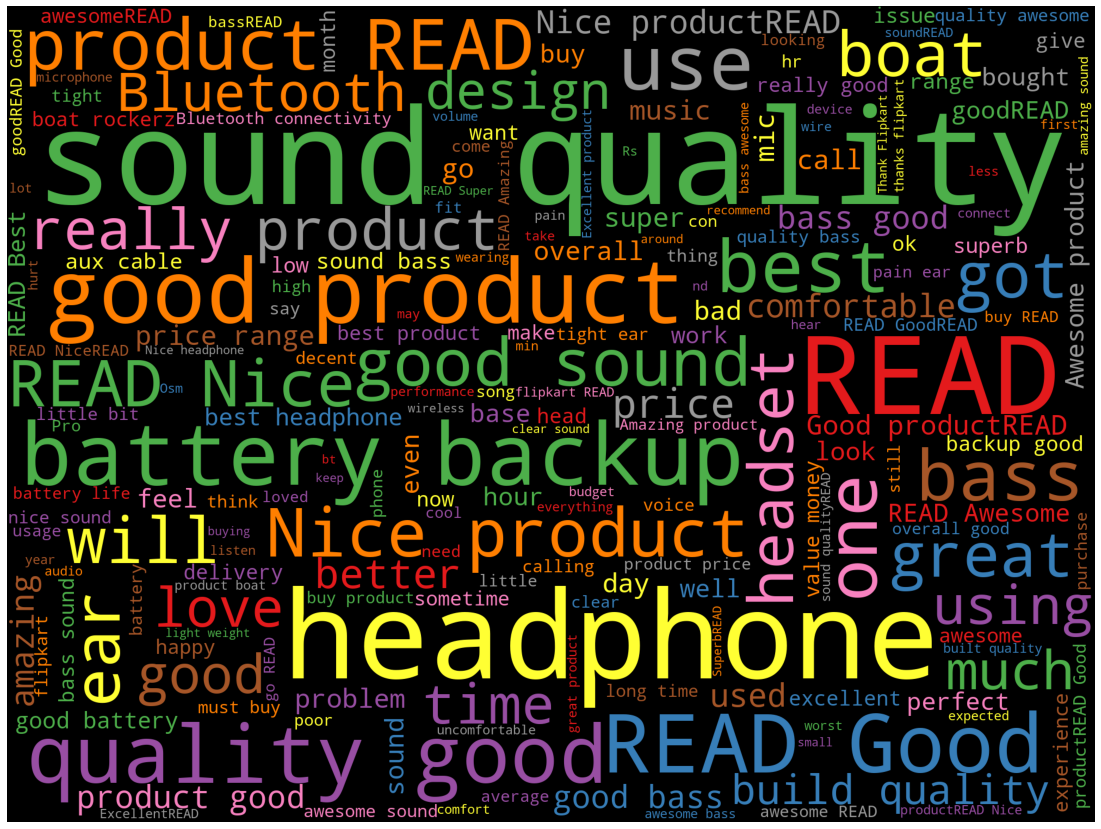

In [107]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(review_data_new)
plt.figure(figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off')

In [108]:
wordcloud.to_file('wordcloud_pic.png')

### visualization of sentiment score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


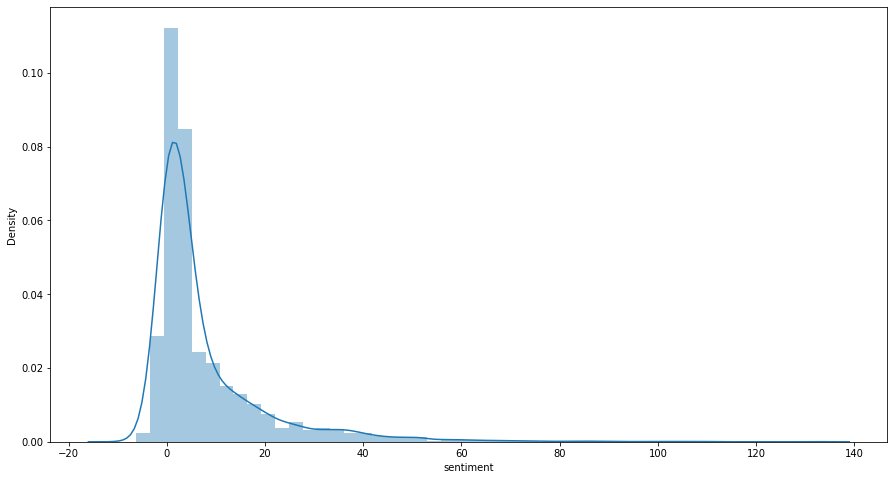

In [109]:
plt.figure(figsize=(15,8))
sns.distplot(sent_df['sentiment'])

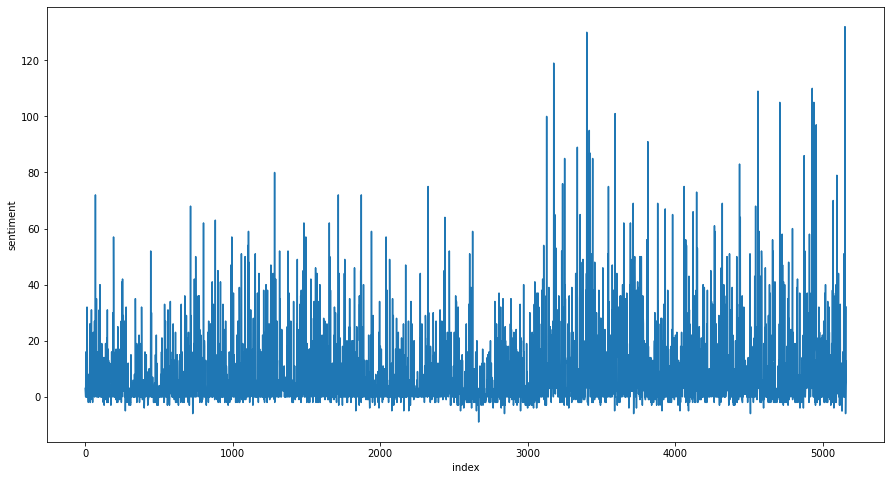

In [110]:
plt.figure(figsize=(15,8))
sns.lineplot(y = 'sentiment',x = 'index',data = sent_df)

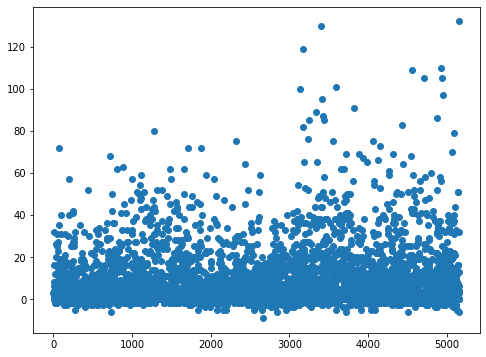

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(x = 'index',y = 'sentiment',data = sent_df)

#### According to sentiment analysis of boat earphone product reviews we can conclude that positive reviews is more as compare to negative reviews so that we can conclude the boat earphone product is good